___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from scipy import stats
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
any(df.isnull().sum())

False

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


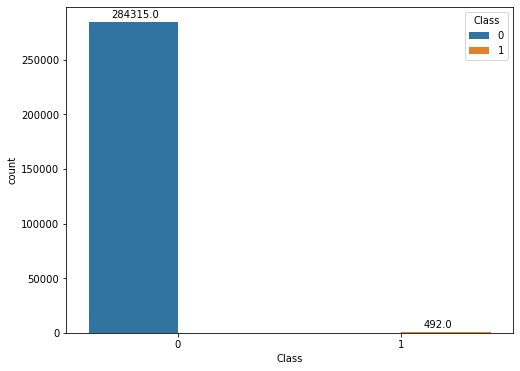

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df.Class, hue=df.Class)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+4000));

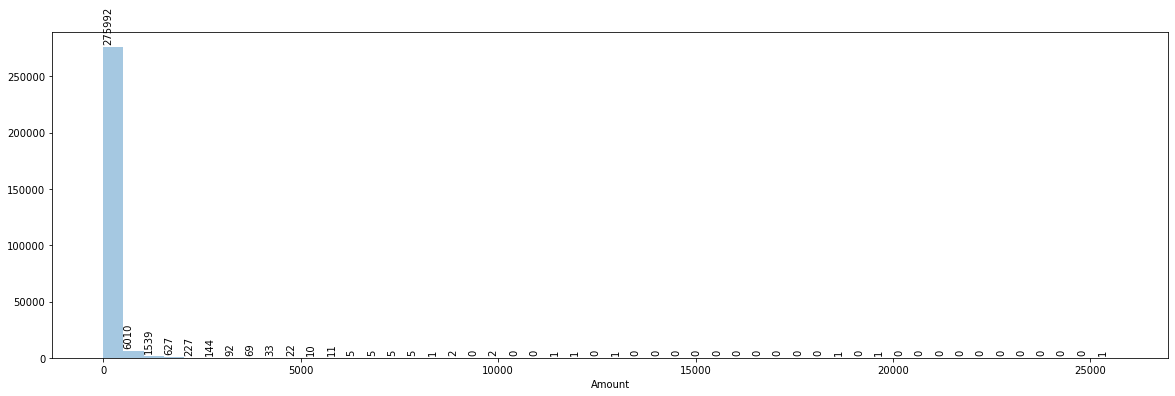

In [11]:
plt.figure(figsize=(20,6))
ax = sns.distplot(df.Amount, kde = False)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+4000), rotation=90);

### Data Cleaning
Check Missing Values and Outliers

In [12]:
for col in df:
    for counter in range(len(df["Class"].unique())):
        
        Q1 = df[df["Class"]==counter][col].quantile(0.25)
        Q3 = df[df["Class"]==counter][col].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-1.5*IQR
        upper_lim = Q3+1.5*IQR
        print(f" count of outlier in {col} column by Class {counter}= {df[df['Class']==counter][(df[df['Class']==counter][col] < lower_lim) | (df[df['Class']==counter][col] > upper_lim)][col].count()} ")
    print()

 count of outlier in Time column by Class 0= 0 
 count of outlier in Time column by Class 1= 0 

 count of outlier in V1 column by Class 0= 6912 
 count of outlier in V1 column by Class 1= 52 

 count of outlier in V2 column by Class 0= 13327 
 count of outlier in V2 column by Class 1= 46 

 count of outlier in V3 column by Class 0= 3095 
 count of outlier in V3 column by Class 1= 53 

 count of outlier in V4 column by Class 0= 10918 
 count of outlier in V4 column by Class 1= 0 

 count of outlier in V5 column by Class 0= 12124 
 count of outlier in V5 column by Class 1= 45 

 count of outlier in V6 column by Class 0= 22829 
 count of outlier in V6 column by Class 1= 15 

 count of outlier in V7 column by Class 0= 8668 
 count of outlier in V7 column by Class 1= 30 

 count of outlier in V8 column by Class 0= 23974 
 count of outlier in V8 column by Class 1= 98 

 count of outlier in V9 column by Class 0= 8090 
 count of outlier in V9 column by Class 1= 17 

 count of outlier in V10 c

In [13]:
df[["Time", "Amount"]]

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


<AxesSubplot:xlabel='Class', ylabel='Time'>

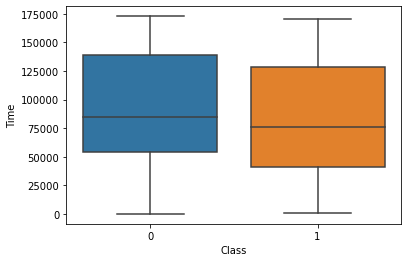

In [14]:
sns.boxplot(y = df.Time, x = df.Class)

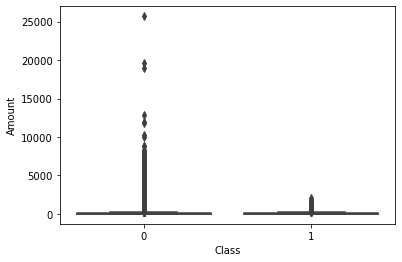

In [15]:
sns.boxplot(y = df.Amount, x = df.Class);

In [16]:
quartiles = df.quantile(q = [1/3, 2/3])
quartiles

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.333333,65096.333333,-0.640588,-0.336101,-0.466159,-0.602006,-0.455403,-0.602144,-0.333849,-0.126824,-0.412954,...,-0.160147,-0.357089,-0.104434,-0.152608,-0.216690,-0.238731,-0.042315,-0.032122,9.99,0.0
0.666667,128593.000000,1.177454,0.520578,0.723818,0.461542,0.364415,0.125498,0.359008,0.197366,0.356571,...,0.107777,0.339791,0.086350,0.323565,0.242539,0.141397,0.049289,0.041034,50.00,0.0


In [17]:
def fraud(x, p,d):
    if x <= d[p][1/3]:
        return 1
    elif x <= d[p][2/3]:
        return 2
    else:
        return 3

In [18]:
d = df.Amount.apply(fraud, args = ("Amount", quartiles))

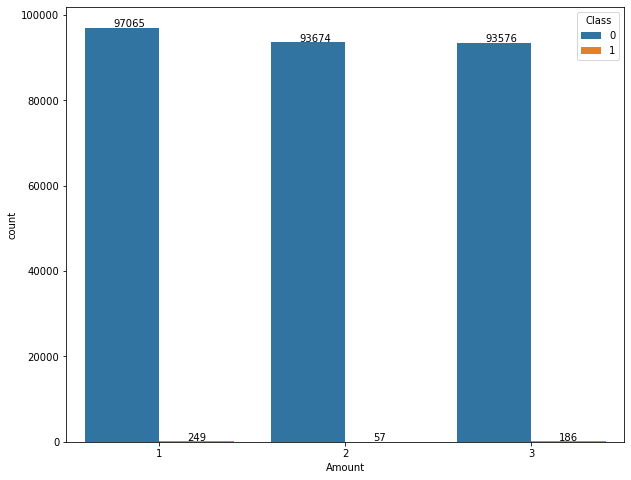

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(d, hue = df.Class)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

In [20]:
d = df.Time.apply(fraud, args = ("Time", quartiles))

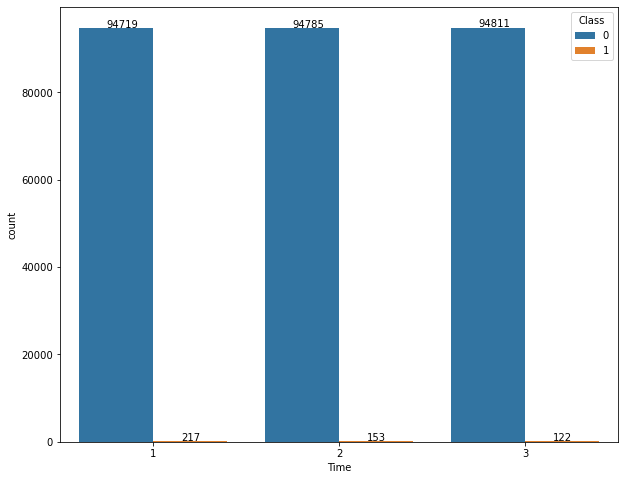

In [21]:
plt.figure(figsize=(10,8))
ax = sns.countplot(d, hue = df.Class)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+100));

---
---


## 2. Data Preprocessing

#### Scaling

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# transform into a dataframe
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state=42)

In [7]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y, test_size = 0.15, stratify = y, random_state=42)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [8]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [14]:
log_model = LogisticRegression(C = 10)

In [15]:
log_model.fit(X_train_sc,y_train_sc)

LogisticRegression(C=10)

***iii. Prediction and Model Evaluating***

In [16]:
y_pred = log_model.predict(X_test_sc)
print(confusion_matrix(y_test_sc, y_pred))
print(classification_report(y_test_sc, y_pred))

[[42637    11]
 [   25    49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.82      0.66      0.73        74

    accuracy                           1.00     42722
   macro avg       0.91      0.83      0.87     42722
weighted avg       1.00      1.00      1.00     42722



In [9]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [12]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    log_model = LogisticRegression(C = 10)
    scores = cross_val_score(log_model, X_train_sc, y_train_sc, cv = 10, scoring = j, n_jobs = -1)
    print([round(i, 4) for i in scores], "\n")
    print(f" {i} : %{scores.mean()*100:.2f} std : %{scores.std()*100:.3f} \n")

[0.9993, 0.9994, 0.9994, 0.9992, 0.9992, 0.999, 0.9991, 0.999, 0.9995, 0.9995] 

 accuracy : %99.93 std : %0.015 

[0.9994, 0.9997, 0.9995, 0.9994, 0.9994, 0.9992, 0.9993, 0.9991, 0.9996, 0.9995] 

 precision-0 : %99.94 std : %0.017 

[0.9999, 0.9997, 0.9999, 0.9998, 0.9998, 0.9999, 0.9999, 0.9999, 0.9998, 1.0] 

 recall-0 : %99.99 std : %0.007 

[0.9996, 0.9997, 0.9997, 0.9996, 0.9996, 0.9995, 0.9996, 0.9995, 0.9997, 0.9997] 

 f1-0 : %99.96 std : %0.008 

[0.9, 0.8293, 0.9355, 0.871, 0.8235, 0.875, 0.8846, 0.913, 0.8919, 0.9677] 

 precision-1 : %88.92 std : %4.179 

[0.6429, 0.8095, 0.6905, 0.6429, 0.6667, 0.5122, 0.561, 0.5, 0.7857, 0.7143] 

 recall-1 : %65.26 std : %9.968 

[0.75, 0.8193, 0.7945, 0.7397, 0.7368, 0.6462, 0.6866, 0.6462, 0.8354, 0.8219] 

 f1-1 : %74.77 std : %6.713 



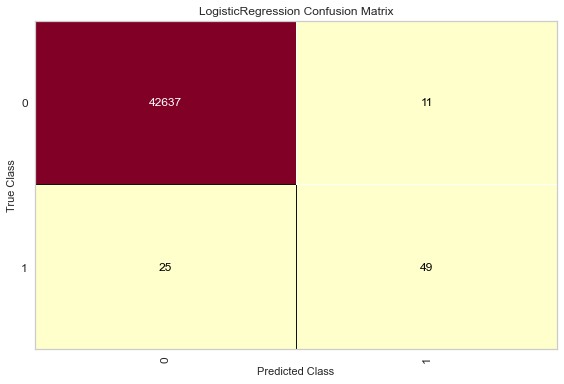

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model, classes=y_test.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_sc, y_train_sc)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_sc, y_test_sc)

# How did we do?
cm.show()


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [18]:
from sklearn.metrics import average_precision_score
y_score = log_model.decision_function(X_test_sc)
average_precision = average_precision_score(y_test_sc, y_score, pos_label = 1)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.70


<Figure size 720x720 with 0 Axes>

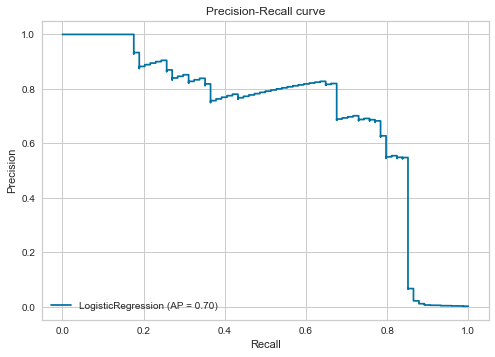

In [19]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(log_model, X_test_sc, y_test_sc)
disp.ax_.set_title('Precision-Recall curve');

***v. Apply and Plot StratifiedKFold***

In [10]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

In [49]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]    
        
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1)) 

    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Learning(10, LogisticRegression(C = 10), X_scaled, y)

Accuracy: %99.9206 std %0.01
Precision 1: %87.8613 std %4.91
Recall 1: %63.0204 std %5.20
F1_score 1: %73.2033 std  %3.78


In [50]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    log_model = LogisticRegression(C = 10)
    scores = cross_val_score(log_model, X_train_sc, y_train_sc, cv = kfold, scoring = j, n_jobs = -1)
    print(f" {i} : %{scores.mean()*100:.2f} std : %{scores.std()*100:.3f} \n")

 accuracy : %99.93 std : %0.015 

 precision-0 : %99.94 std : %0.017 

 recall-0 : %99.99 std : %0.007 

 f1-0 : %99.96 std : %0.008 

 precision-1 : %88.92 std : %4.179 

 recall-1 : %65.26 std : %9.968 

 f1-1 : %74.77 std : %6.713 



- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [11]:
os = SMOTE(random_state=42)
os_data_X, os_data_y=os.fit_sample(X_train_sc, y_train_sc)
os_data_X_sc = pd.DataFrame(data=os_data_X,columns= X.columns)
os_data_y_sc= pd.DataFrame(data=os_data_y,columns=["Class"])

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [54]:
os_data_X_sc.shape

(483334, 30)

In [55]:
os_data_y_sc.shape

(483334, 1)

***ii. Model Training***

In [12]:
log_model_smote = LogisticRegression(C=10).fit(os_data_X_sc, os_data_y_sc)

***iii. Prediction and Model Evaluating***

In [15]:
y_pred = log_model_smote.predict(X_test_sc)

In [16]:
y_pred = log_model_smote.predict(X_test_sc)
print(confusion_matrix(y_test_sc, y_pred))
print(classification_report(y_test_sc, y_pred))

[[41594  1054]
 [    8    66]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42648
           1       0.06      0.89      0.11        74

    accuracy                           0.98     42722
   macro avg       0.53      0.93      0.55     42722
weighted avg       1.00      0.98      0.99     42722



***iv.  Plot Precision and Recall Curve***


In [17]:
from sklearn.metrics import average_precision_score
y_score = log_model_smote.predict(X_test_sc)
average_precision = average_precision_score(y_test_sc, y_score, pos_label = 1)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.05


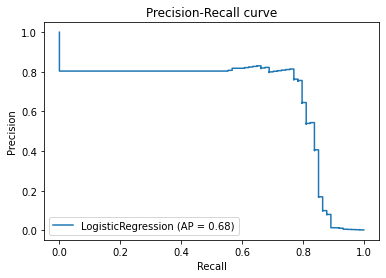

In [77]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(log_model_smote, X_test_sc, y_test_sc)
disp.ax_.set_title('Precision-Recall curve');

***v. Apply and Plot StratifiedKFold***

**We do the cross validation manually with StratifiedKFold since our train set is oversampled.**

In [19]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]    

        
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_resampled, y_resampled)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    print([round(i, 4) for i in acc_scores])
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f} \n')
    print([round(i, 4) for i in pre_scores])
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f} \n')
    print([round(i, 4) for i in rec_scores])
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f} \n')
    print([round(i, 4) for i in f1_scores])
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Learning(10, LogisticRegression(C=10), X_scaled, y)

Accuracy: %97.1809 std %1.22
Precision 1: %6.1771 std %2.74
Recall 1: %87.5755 std %10.60
F1_score 1: %11.3713 std  %4.62


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier().fit(os_data_X_sc, os_data_y_sc)

***ii. Prediction and Model Evaluating***

In [22]:
y_pred = rf.predict(X_test_sc)
print(confusion_matrix(y_test_sc, y_pred))
print(classification_report(y_test_sc, y_pred))

[[42638    10]
 [   16    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.85      0.78      0.82        74

    accuracy                           1.00     42722
   macro avg       0.93      0.89      0.91     42722
weighted avg       1.00      1.00      1.00     42722



***iii. Plot Precision and Recall Curve***


Text(0.5, 1.0, 'class Precision-Recall curve')

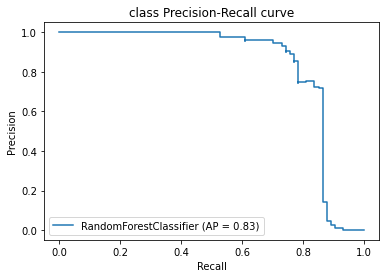

In [23]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf, X_test_sc, y_test_sc)
disp.ax_.set_title('class Precision-Recall curve')

***iv. Apply and Plot StratifiedKFold***

**We do the cross validation manually with StratifiedKFold since our train set is oversampled.**

In [24]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]    

        
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_resampled, y_resampled)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    print([round(i, 4) for i in acc_scores])
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f} \n')
    print([round(i, 4) for i in pre_scores])
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f} \n')
    print([round(i, 4) for i in rec_scores])
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f} \n')
    print([round(i, 4) for i in f1_scores])
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Learning(10, RandomForestClassifier(), X_scaled, y)

[0.9984551104244935, 0.9990519995786665, 0.9997893332397036, 0.9994733330992591, 0.9993679997191109, 0.9985253326779256, 0.9993328885923949, 0.9994733146067416, 0.9995084269662922, 0.9994030898876405]
Accuracy: %99.9238 std %0.04 

[0.5324675324675324, 0.9230769230769231, 0.9215686274509803, 0.9722222222222222, 0.8780487804878049, 0.5606060606060606, 0.803921568627451, 0.8863636363636364, 0.9487179487179487, 0.9]
Precision 1: %83.2699 std %14.95 

[0.8367346938775511, 0.4897959183673469, 0.9591836734693877, 0.7142857142857143, 0.7346938775510204, 0.74, 0.82, 0.7959183673469388, 0.7551020408163265, 0.7346938775510204]
Recall 1: %75.8041 std %11.28
[0.6507936507936507, 0.64, 0.9400000000000001, 0.8235294117647058, 0.8, 0.6379310344827586, 0.8118811881188118, 0.8387096774193548, 0.8409090909090908, 0.8089887640449438]
F1_score 1: %77.9274 std  %9.66


<AxesSubplot:>

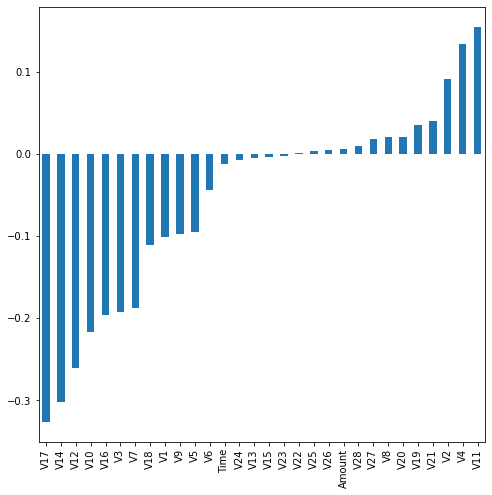

In [130]:
plt.figure(figsize = (8,8))
df.corr()["Class"].sort_values()[:-1].plot(kind="bar")

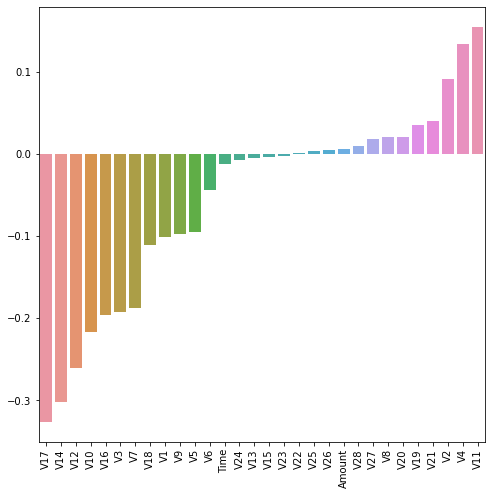

In [131]:
plt.figure(figsize = (8,8))
sns.barplot(df.corr()["Class"].sort_values()[:-1].index, df.corr()["Class"].sort_values()[:-1].values)
plt.xticks(rotation=90);

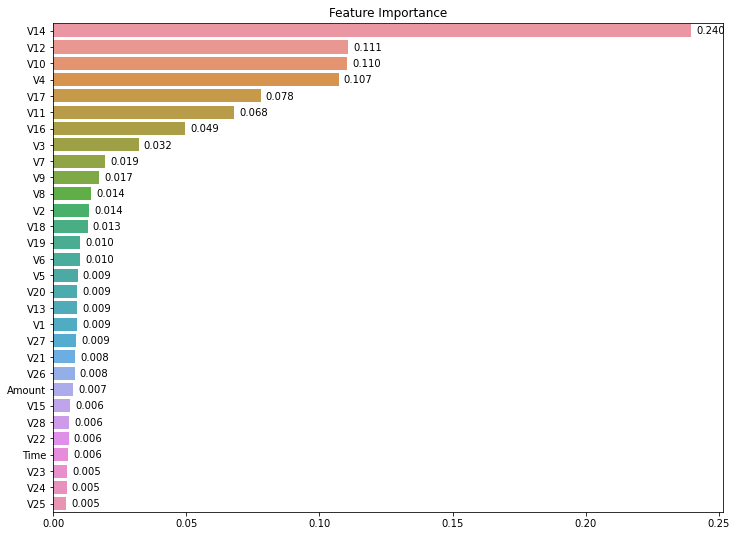

In [25]:
from sklearn.feature_selection import RFE
selector = RFE(rf, n_features_to_select=30, step=10,verbose=2)
selector = selector.fit(X_scaled, y)
selector.support_

features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features
X.columns[features]

feature_imp = pd.Series(rf.feature_importances_[features],
                        index=X_train.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")


for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

**We are rebuilding our model according to the first 8 features within the scope of feature importance.**

In [31]:
X2 = X_scaled[["V14", "V10", "V4", "V12", "V3", "V17", "V11", "V16"]]

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.15, stratify = y, random_state=42)

In [33]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
os_data_X2, os_data_y2=os.fit_sample(X_train2, y_train2)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns= X2.columns)
os_data_y2 = pd.DataFrame(data=os_data_y2,columns=["Class"])

In [34]:
rf2 = RandomForestClassifier().fit(os_data_X2, os_data_y2)

In [35]:
y_pred = rf2.predict(X_test2)
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

[[42616    32]
 [   15    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.65      0.80      0.72        74

    accuracy                           1.00     42722
   macro avg       0.82      0.90      0.86     42722
weighted avg       1.00      1.00      1.00     42722



**We do the cross validation manually with StratifiedKFold since our train set is oversampled.**

In [36]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42))
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]    

        
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_resampled, y_resampled)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    print([round(i, 4) for i in acc_scores])
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f} \n')
    print([round(i, 4) for i in pre_scores])
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f} \n')
    print([round(i, 4) for i in rec_scores])
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f} \n')
    print([round(i, 4) for i in f1_scores])
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Learning(5, RandomForestClassifier(), X2, y)

[0.9989, 0.9995, 0.998, 0.9992, 0.9994]
Accuracy: %99.9010 std %0.05 

[0.6181, 0.8925, 0.4551, 0.75, 0.8706]
Precision 1: %71.7249 std %16.36 

[0.899, 0.8384, 0.7245, 0.8265, 0.7551]
Recall 1: %80.8699 std %6.22 

[0.7325, 0.8646, 0.5591, 0.7864, 0.8087]
F1_score 1: %75.0260 std  %10.46


**When we select class_weight parameter  the RandomForestClassifier as "balenced", our model turns into a balanced.**

In [186]:
rf3 = RandomForestClassifier(class_weight ="balanced").fit(X_train2, y_train2)

In [187]:
y_pred2 = rf3.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[42646     2]
 [   18    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.97      0.76      0.85        74

    accuracy                           1.00     42722
   macro avg       0.98      0.88      0.92     42722
weighted avg       1.00      1.00      1.00     42722



In [81]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
custom_scorer = {
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    rf3 = RandomForestClassifier(class_weight ="balanced")
    scores = cross_val_score(rf3, X_train2, y_train2, cv = skf, scoring = j, n_jobs = -1)
    print([round(i, 4) for i in scores], "\n")
    print(f" {i} : %{scores.mean()*100:.2f} std : %{scores.std()*100:.3f} \n")

[0.9467, 0.9577, 0.9041, 0.9692, 0.9375] 

 precision-1 : %94.31 std : %2.219 

[0.8554, 0.8193, 0.7976, 0.75, 0.7262] 

 recall-1 : %78.97 std : %4.662 

[0.9172, 0.8831, 0.8462, 0.8477, 0.8108] 

 f1-1 : %86.10 std : %3.623 



### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

**We put our oversampled dataset into the model.**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

***ii. Define Model***

In [41]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, patience = 10, restore_best_weights=True)

In [42]:
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

***iii. Compile Model***

In [43]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ["accuracy"])

***iv. Fit Model***

In [44]:
history = model.fit(x=os_data_X_sc.values, 
          y=os_data_y_sc.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test_sc.values, y_test_sc.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
945/945 [==============================] - 4s 3ms/step - loss: 0.4049 - accuracy: 0.8380 - val_loss: 0.1334 - val_accuracy: 0.9790
Epoch 2/100
945/945 [==============================] - 3s 3ms/step - loss: 0.1371 - accuracy: 0.9507 - val_loss: 0.0950 - val_accuracy: 0.9767
Epoch 3/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0933 - accuracy: 0.9660 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 4/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0700 - accuracy: 0.9766 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 5/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0541 - accuracy: 0.9819 - val_loss: 0.0506 - val_accuracy: 0.9842
Epoch 6/100
945/945 [==============================] - 2s 3ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 7/100
945/945 [==============================] - 2s 3ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0377 - val_accuracy: 0.9883

Epoch 58/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9979
Epoch 59/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0091 - val_accuracy: 0.9981
Epoch 60/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0096 - val_accuracy: 0.9979
Epoch 61/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0095 - val_accuracy: 0.9980
Epoch 62/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 63/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 64/100
945/945 [==============================] - 3s 3ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0098 - val_accuracy:

***v. Prediction and Model Evaluating***

In [45]:
y_pred = model.predict_classes(X_test_sc.values)

In [46]:
print(classification_report(y_test_sc.values, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.49      0.84      0.62        74

    accuracy                           1.00     42722
   macro avg       0.74      0.92      0.81     42722
weighted avg       1.00      1.00      1.00     42722



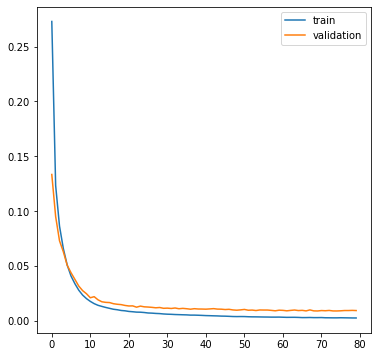

In [47]:
plt.figure(figsize=(6,6))
plt.plot(history.history["loss"], label= "train")
plt.plot(history.history["val_loss"], label= "validation")
plt.legend();

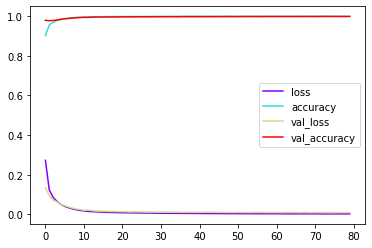

In [48]:
model_loss = pd.DataFrame(history.history)
model_loss.plot(colormap ='rainbow');

**We do the cross validation manually with StratifiedKFold since our train set is oversampled.**

In [57]:
def Learning(n, X, y):
    
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        model_1 = Sequential()
        model_1.add(Dense(30,activation='relu')) 
        model_1.add(BatchNormalization())
        model_1.add(Dense(15,activation='relu'))
        model_1.add(BatchNormalization())
        model_1.add(Dense(units=1,activation='sigmoid'))
        opt = Adam(learning_rate=0.0001)
        # Compile model
        model_1.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
        early_stop = EarlyStopping(monitor="val_loss", verbose =0, patience = 10, restore_best_weights=True)
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]    

        
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model_1.fit(x= X_resampled.values, y= y_resampled.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test.values, y_test.values), callbacks = [early_stop], verbose =0)
        
        y_pred = model_1.predict_classes(X_test.values)
        
        
        acc_scores.append(accuracy_score(y_test.values, y_pred))
        pre_scores.append(precision_score(y_test.values, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test.values, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test.values, y_pred, pos_label=1))
        
    print([round(i, 4) for i in acc_scores])
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f} \n')
    print([round(i, 4) for i in pre_scores])
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f} \n')
    print([round(i, 4) for i in rec_scores])
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f} \n')
    print([round(i, 4) for i in f1_scores])
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Learning(5, X_scaled, y)

[0.9988, 0.9989, 0.9987, 0.9989, 0.9983]
Accuracy: %99.8736 std %0.02 

[0.622, 0.6277, 0.5899, 0.6583, 0.5098]
Precision 1: %60.1570 std %5.08 

[0.798, 0.8687, 0.8367, 0.8061, 0.7959]
Recall 1: %82.1088 std %2.79 

[0.6991, 0.7288, 0.692, 0.7248, 0.6215]
F1_score 1: %69.3239 std  %3.86


**this time, we put our data without Oversampling into the model.**

In [62]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, patience = 10, restore_best_weights=True)

In [63]:
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

In [64]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ["accuracy"])

In [65]:
history = model.fit(x=X_train_sc.values, 
          y=y_train_sc.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test_sc.values, y_test_sc.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
473/473 [==============================] - 3s 4ms/step - loss: 0.7473 - accuracy: 0.6014 - val_loss: 0.5977 - val_accuracy: 0.7544
Epoch 2/100
473/473 [==============================] - 1s 3ms/step - loss: 0.5652 - accuracy: 0.8012 - val_loss: 0.4593 - val_accuracy: 0.9497
Epoch 3/100
473/473 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.9556 - val_loss: 0.3331 - val_accuracy: 0.9928
Epoch 4/100
473/473 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.9917 - val_loss: 0.2327 - val_accuracy: 0.9977
Epoch 5/100
473/473 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.9976 - val_loss: 0.1611 - val_accuracy: 0.9988
Epoch 6/100
473/473 [==============================] - 1s 3ms/step - loss: 0.1494 - accuracy: 0.9989 - val_loss: 0.1108 - val_accuracy: 0.9989
Epoch 7/100
473/473 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9992 - val_loss: 0.0778 - val_accuracy: 0.9991

473/473 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 58/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 59/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 60/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 61/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 62/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 63/100
473/473 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch

In [68]:
y_pred = model.predict_classes(X_test_sc.values)

In [69]:
print(confusion_matrix(y_test_sc, y_pred))
print(classification_report(y_test_sc.values, y_pred))

[[42639     9]
 [   16    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.87      0.78      0.82        74

    accuracy                           1.00     42722
   macro avg       0.93      0.89      0.91     42722
weighted avg       1.00      1.00      1.00     42722



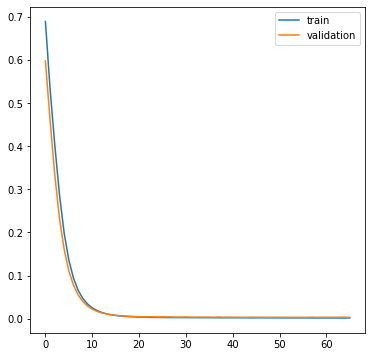

In [66]:
plt.figure(figsize=(6,6))
plt.plot(history.history["loss"], label= "train")
plt.plot(history.history["val_loss"], label= "validation")
plt.legend();

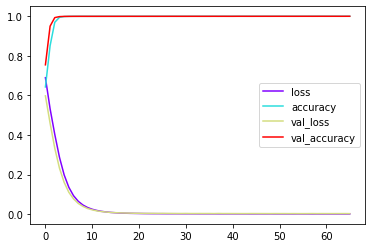

In [67]:
model_loss = pd.DataFrame(history.history)
model_loss.plot(colormap ='rainbow');

**We can put our data without oversampling into cross validation as follows.**

In [70]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30,activation='relu')) 
    model.add(BatchNormalization())
    model.add(Dense(15,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1,activation='sigmoid'))
    opt = Adam(learning_rate=0.0001)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model
# evaluate model with standardized dataset
early_stop = EarlyStopping(monitor="val_loss", verbose =0, patience = 10, restore_best_weights=True)

kfold = StratifiedKFold(n_splits=5, shuffle = True)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
for i, j in custom_scorer.items():
    estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=512, verbose=0)
    scores = cross_val_score(estimator, X_train_sc.values, y_train_sc.values, cv=kfold, n_jobs=-1, scoring = j, fit_params={'callbacks':early_stop})
    print([round(i, 4) for i in scores], "\n")
    print(f" {i} : %{scores.mean()*100:.2f} std : %{scores.std()*100:.3f} \n")

[0.9995, 0.9995, 0.9996, 0.9995, 0.9993] 

 accuracy : %99.95 std : %0.009 

[0.9429, 0.8378, 0.8718, 0.9286, 0.9412] 

 precision-1 : %90.44 std : %4.221 

[0.7952, 0.7349, 0.7976, 0.7143, 0.7976] 

 recall-1 : %76.79 std : %3.598 

[0.8456, 0.7887, 0.8435, 0.8701, 0.8408] 

 f1-1 : %83.78 std : %2.667 



**We can also put our data without oversampling into cross validation as follows with MLPClassifier**

In [71]:
from sklearn.neural_network import MLPClassifier

# evaluate model with standardized dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
for i, j in custom_scorer.items():
    model2 = MLPClassifier(random_state=42, max_iter=300)
    scores = cross_val_score(model2, X_train_sc.values, y_train_sc.values, cv=kfold, n_jobs=-1, scoring = j)
    print([round(i, 4) for i in scores], "\n")
    print(f" {i} : %{scores.mean()*100:.2f} std : %{scores.std()*100:.3f} \n")

[0.9994, 0.9996, 0.9995, 0.9994, 0.9994] 

 accuracy : %99.95 std : %0.008 

[0.9104, 0.9333, 0.9054, 0.9014, 0.9231] 

 precision-1 : %91.47 std : %1.182 

[0.7349, 0.8434, 0.7976, 0.7619, 0.7143] 

 recall-1 : %77.04 std : %4.592 

[0.8133, 0.8861, 0.8481, 0.8258, 0.8054] 

 f1-1 : %83.57 std : %2.902 



***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [78]:
import pickle

In [79]:
pickle.dump(rf2, open('rf2_model.pkl', 'wb'))

### Save and Export Variables as .pkl

In [80]:
pickle.dump(X2.columns, open('variables.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___